In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv').drop(columns={'Ticket','Fare','Cabin'}).dropna()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [6]:
train['Sex']=pd.get_dummies(train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,0


In [4]:
train['Embarked']=train['Embarked'].replace({'S':0,'C':1,'Q':2},regex=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,0


Plotting of Some Graphs

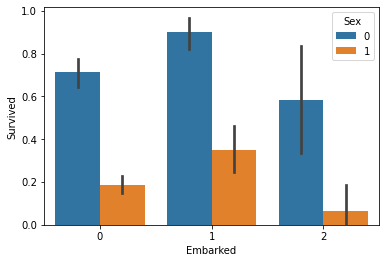

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.barplot(data=train,x='Embarked',y='Survived',hue='Sex')


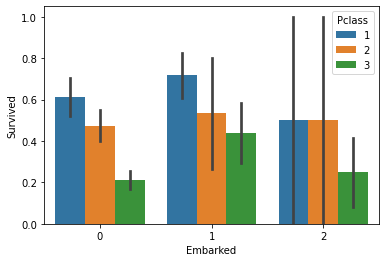

In [8]:
sns.barplot(data=train,x='Embarked',y='Survived',hue='Pclass')

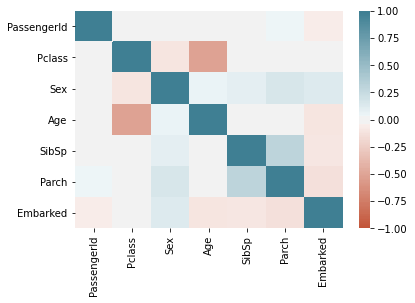

In [45]:

sns.heatmap(test.corr(),vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200))

Training of Model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [35]:
x=train[['Sex','Embarked','Parch','SibSp','Pclass','Age']]
y=train[['Survived']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rf=RandomForestClassifier(random_state=0,max_features=5).fit(x_train,y_train)
ran=rf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [36]:
print('Accuracy Score for Random Forest',accuracy_score(y_test,ran))
print('Precision Score {:.2f}'.format(precision_score(y_test,ran)))
print('F1 Score {:.2f}'.format(f1_score(y_test,ran)))
print('Recall Score {:.2f}'.format(recall_score(y_test,ran)))

Accuracy Score for Random Forest 0.7622377622377622
Precision Score 0.76
F1 Score 0.71
Recall Score 0.67


Testing DataFrame

In [21]:
test=pd.read_csv('/kaggle/input/titanic/test.csv').drop(columns={'Ticket','Fare','Cabin'})
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S


In [26]:
test['Embarked']=test['Embarked'].replace({'S':0,'C':1,'Q':2},regex=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,0


In [27]:
test['Sex']=pd.get_dummies(test['Sex'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,0


In [40]:
test.fillna(0,inplace=True)
test1=test[['Sex','Embarked','Parch','SibSp','Pclass','Age']]

The survival or non-survival depends on the factors like Pclass,Embarkness,SibSp,Parch,Sex,Age and therefore the dataframe is made on these terms of these features 

In [42]:
tet=test[['PassengerId','Name']]
pred1=rf.predict(test1)
x=pd.DataFrame(pred1,columns=['Survived'])

mer=pd.merge(tet,x,how='outer',left_index=True,right_index=True).rename(columns={0:'Survived'})
mer.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,0


In [43]:
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.to_csv('submission.csv', index=False)

In [44]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
